# 단순 선형 회귀(Linear Regression)

### 아버지와 아들의 키 - Galton

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('http://www.randomservices.org/random/data/Galton.txt', sep='\t')
df.head()

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Family  898 non-null    object 
 1   Father  898 non-null    float64
 2   Mother  898 non-null    float64
 3   Gender  898 non-null    object 
 4   Height  898 non-null    float64
 5   Kids    898 non-null    int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 42.2+ KB


In [4]:
df = df[df.Gender == 'M'] # 남자인 아이만 뽑기
height = df[['Father', 'Height']].rename(columns={'Height':'Son'}) # height이라는 새로운 데이터프레임을 생성 / height의 column은 Son으로 변경한다.
height.Father = height.Father * 2.54 # 인치를 cm로 변환
height.Son = height.Son * 2.54 # 인치를 cm로 변환
height.describe()

,Father,Son
count,465.000000,465.000000
mean,175.687157,175.841196
std,5.841820,6.684249
min,157.480000,152.400000
25%,172.720000,171.450000
50%,175.260000,175.768000
75%,179.070000,180.340000
max,199.390000,200.660000


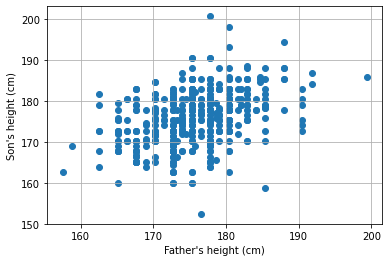

In [5]:
plt.scatter(height.Father, height.Son) # x= 아빠의 키, y=아들의 키
plt.xlabel("Father's height (cm)")
plt.ylabel("Son's height (cm)")
plt.grid()
plt.show()

### Numpy를 이용해서 회귀선 구하기

In [6]:
A = np.vstack([height.Father, np.ones(len(height.Father))]).T
# np.ones = 465개(아빠의 키)만큼 1로 채워진 값채워진 값
A.shape

(465, 2)

In [7]:
reg = np.linalg.lstsq(A, height.Son, rcond=None)# y값을 아들의 키
reg

(array([ 0.44774792, 97.17763701]),
 array([17556.59951549]),
 2,
 array([3.79064358e+03, 7.15847817e-01]))

In [8]:
# 기울기와 절편
# 0.44774792: 기울기
# 97.17763701 : 절편
m, c = reg[0]

In [9]:
# 잔차 제곱의 합(Residual Sum of Square)
rss = reg[1][0]

In [10]:
print(f'기울기: {m:.4f}, 절편: {c:.4f}, 잔차 제곱: {rss:.2f}')

기울기: 0.4477, 절편: 97.1776, 잔차 제곱: 17556.60


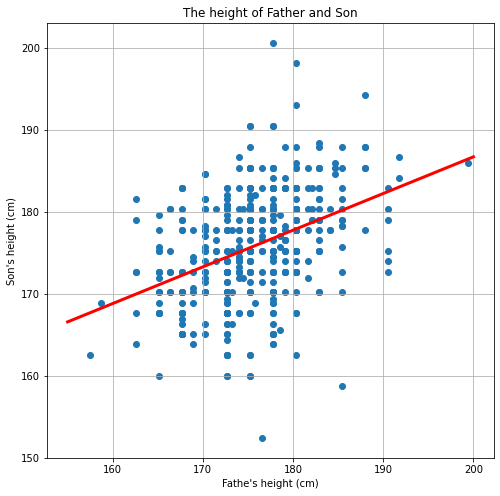

In [11]:
plt.figure(figsize=(8,8))
plt.scatter(height.Father, height.Son)
plt.plot([155,200], [m*155+c,m*200+c], 'r', lw=3)
plt.title('The height of Father and Son')
plt.xlabel("Fathe's height (cm)")
plt.ylabel("Son's height (cm)")
plt.grid()
plt.show()

### Scikit-Learn을 이용해서 구하기

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
X = height.Father.values.reshape(-1, 1) 
# x가 1차원이면 선형 회귀식의 x값으로 줄 수 없다. values까지만하면 1차원이기때문에, 2차원으로 주기위해 reshape(-1,1)을 적어야함
y = height.Son.values

In [14]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [15]:
weight, bias = lr.coef_, lr.intercept_ #coefficient, intercept
rss = lr._residues
print(f'기울기: {weight[0]:.4f}, 절편: {bias:.4f}, 잔차 제곱: {rss:.2f}')
# coef => 계수 , intercept : 절편
# lr.coef_는 다차원으로, 리스트로 되어있기때문에 [0]이라는값도 알아야 구할 수 있다.

기울기: 0.4477, 절편: 97.1776, 잔차 제곱: 17556.60


In [16]:
score = lr.score(X, y)
print(f'R_squared score: {score:.4f}')

R_squared score: 0.1531


## 당뇨병 데이터 셋

In [17]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns= diabetes.feature_names)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [18]:
diabetes.target[:5]

array([151.,  75., 141., 206., 135.])

### 당뇨병 vs BMI

In [19]:
X = diabetes.data[:, 2].reshape(-1, 1) # 2차원 시 reshape 
y = diabetes.target

In [20]:
X.shape # 데이터 442건, 

(442, 1)

In [21]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [22]:
weight, bias = lr.coef_, lr.intercept_ #coefficient, intercept
rss = lr._residues
print(f'기울기: {weight[0]:.4f}, 절편: {bias:.4f}, 잔차 제곱: {rss:.2f}')

기울기: 949.4353, 절편: 152.1335, 잔차 제곱: 1719581.81


### 훈련/테스트 데이터 셋 분리 후 학습/예측/평가

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size= 0.05, random_state=2021
)

In [24]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [25]:
pred = lr.predict(X_test)

In [26]:
# # 모델 평가하기 (선형회귀에서 사용하는 주요 평가지표)
# # 선형회귀의 정확도를 구할때
# 선형회귀의 평가 지표
from sklearn.metrics import r2_score, mean_squared_error
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)# 루트를 씌여서 구함
print(f'Mean Squared Error: {mse:.4f}, RMSE: {rmse:.4f}')

Mean Squared Error: 3470.1713, RMSE: 58.9082


In [27]:
score = r2_score(y_test, pred)
print(f'R_squared: {score:.4f}')

R_squared: 0.0939


####  그래프로 확인 

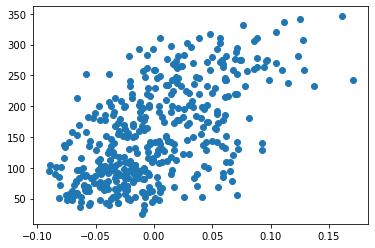

In [28]:
plt.scatter(X_train, y_train)
plt.show()

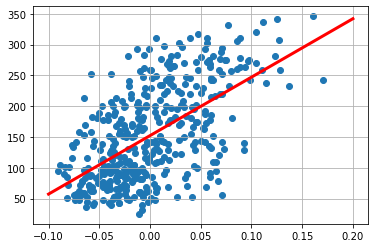

In [29]:
plt.scatter(X_train, y_train)
plt.plot([-0.1, 0.2], [-0.1*weight+bias, 0.2*weight+bias], 'r', lw=3)
plt.grid()
plt.show()

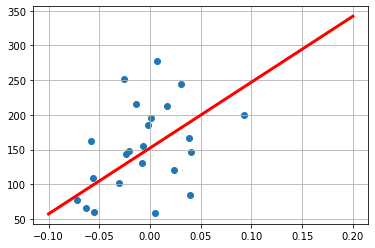

In [30]:
plt.scatter(X_test, y_test)
# plt.scatter(X_test, pred, c='g')
plt.plot([-0.1, 0.2], [-0.1*weight+bias, 0.2*weight+bias], 'r', lw=3)
plt.grid()
plt.show()

### 당뇨병 vs BP

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    diabetes.data[:, 3], y, test_size= 0.05, random_state=2021
)

In [32]:
X_train, X_test = X_train.reshape(-1, 1), X_test.reshape(-1, 1)

In [33]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

In [34]:
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse) # 루트를 씌여서 구함
print(f'Mean Squared Error: {mse:.4f}, RMSE: {rmse:.4f}')
score = r2_score(y_test, pred)
print(f'R_squared: {score:.4f}')

Mean Squared Error: 1999.8592, RMSE: 44.7198
R_squared: 0.4778


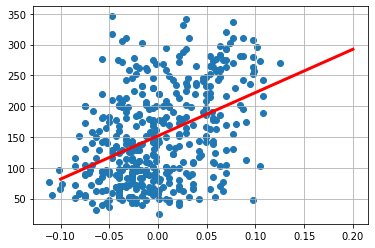

In [35]:
weight, bias = lr.coef_, lr.intercept_
plt.scatter(X_train, y_train)
plt.plot([-0.1, 0.2], [-0.1*weight+bias, 0.2*weight+bias], 'r', lw=3)
plt.grid()
plt.show()

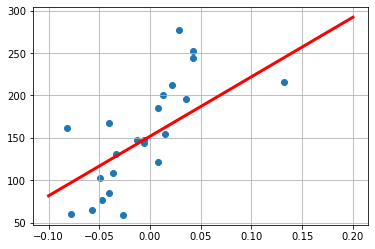

In [36]:
plt.scatter(X_test, y_test)
# plt.scatter(X_test, pred, c='g')
plt.plot([-0.1, 0.2], [-0.1*weight+bias, 0.2*weight+bias], 'r', lw=3)
plt.grid()
plt.show()

### 회귀 표본 만들기

In [37]:
from sklearn.datasets import make_regression

In [38]:
X, y = make_regression(n_samples=100, n_features=1, n_targets=1, random_state=2021)# n_features : 독립변수가 몇개

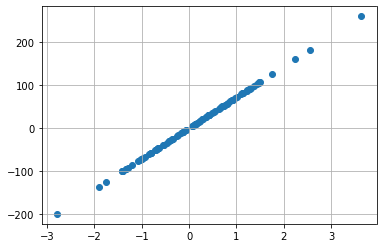

In [39]:
plt.scatter(X, y)
plt.grid()
plt.show()

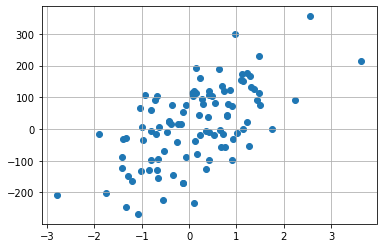

In [40]:
X, y = make_regression(n_samples=100, n_features=1, n_targets=1, noise=100, random_state=2021)
plt.scatter(X, y)
plt.grid()
plt.show()

In [41]:
lr = LinearRegression()
lr.fit(X, y)
weight, bias = lr.coef_, lr.intercept_

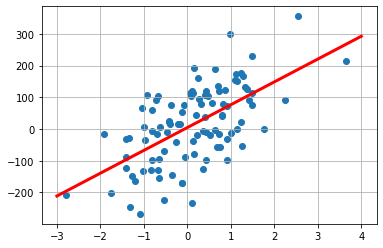

In [42]:
plt.scatter(X, y)
plt.plot([-3, 4], [-3*weight+bias, 4*weight+bias], 'r', lw=3)
plt.grid()
plt.show()

In [43]:
lr.score(X, y)

0.3644244725778779